In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
def load_data(id):
    data = fetch_ucirepo(id=id)
    X = pd.DataFrame(data.data.features)
    y = pd.DataFrame(data.data.targets)
    df = pd.concat([X, y], axis = 1) 
    return df

In [4]:
def binarize_output(df):
    df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0).astype('int64')
    return df

In [5]:
def drop_features(df, cols):
    df = df.drop(columns = cols)
    return df

In [6]:
#Preparations

heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

df = pd.concat([X, y], axis = 1)

#df.to_csv(r"../data/heart_disease.csv")
#df.dtypes  #no need for encoding, all numerical values.
#df.info()
#X.isnull().sum()


In [7]:
#load dataset
def split_features_target(dataset):
    X = dataset.data.features 
    y = dataset.data.targets  
    return X, y

In [8]:
def split_train_test(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [9]:
def fill_missing(X, target_columns):
    X[target_columns] = X[target_columns].fillna(X[target_columns].median())    #ca and thal can't be decimal

In [ ]:
# def encode(x_train, x_test, target_col):
#     encoder = OneHotEncoder()
#     x_train_encoded = encoder.fit_transform(x_train[target_col])
#     x_test_encoded = encoder.transform(x_test[target_col])
#     encoded_train_df = pd.DataFrame(x_train_encoded, columns=encoder.get_feature_names_out(target_col))
#     encoded_test_df = pd.DataFrame(x_test_encoded, columns=encoder.get_feature_names_out(target_col))
#     return encoded_train_df, encoded_test_df

# no need for this function, all are numerical values.

In [11]:
def scale_data(x_train, x_test):
    std_scaler = StandardScaler()
    x_train = std_scaler.fit_transform(x_train)
    x_test = std_scaler.transform(x_test)
    return x_train, x_test


In [12]:
def correlation(df, target = None):
    corr = df.corr(numeric_only=True).abs()     #'numeric_only is' merely a safety precaution,
                                                #data is supposed to be numerical anyways.
    if target:                                                           
        return corr[target].sort_values(ascending = False)          
    else:
        return corr

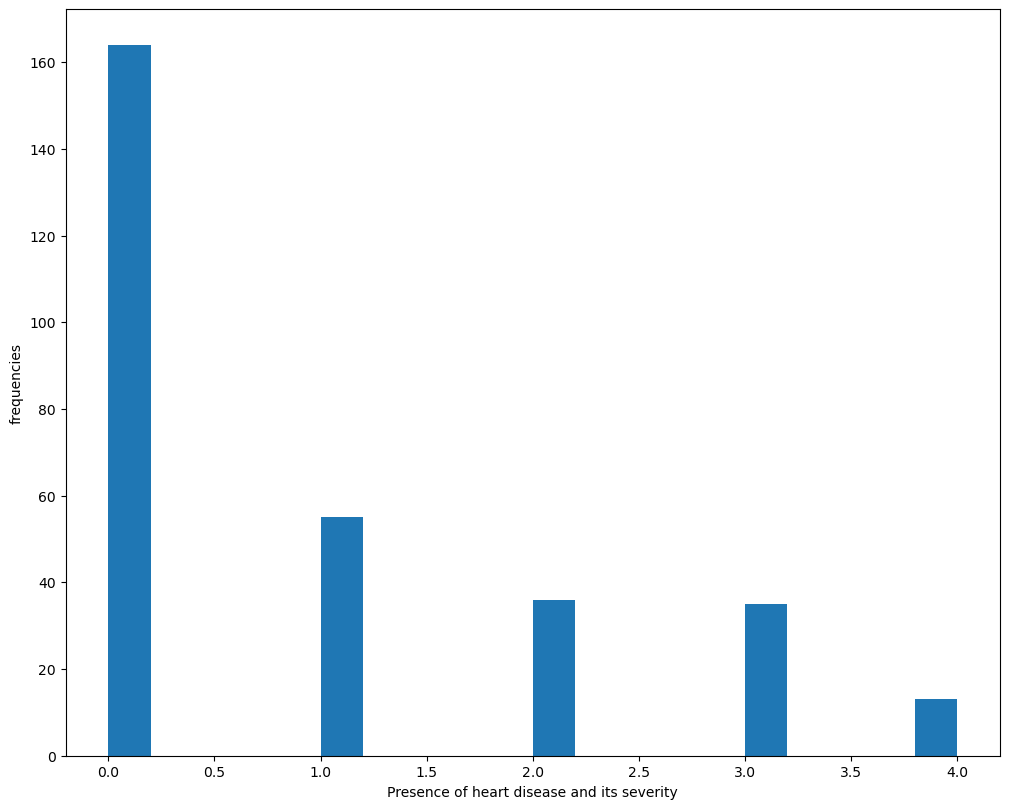

In [17]:
def visualize_data(x, y, mode):
    plt.figure(figsize=(10, 8))
    if mode == "histogram":
        plt.hist(y, bins = 20)
        plt.tight_layout()
        plt.xlabel('Presence of heart disease and its severity')
        plt.ylabel('frequencies')

    if mode == "heatmap":
        plt.figure(figsize=(24, 8))
        sns.heatmap(correlation(df), annot=True, cmap = 'Blues')
        plt.title('correlation heatmap')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

    if mode == "boxplot":
        sns.boxplot(data=x, orient="h")
        plt.title("Boxplot of Heart Disease Dataset (All Numeric Columns)", fontsize=16)
        plt.xlabel("Value Range", fontsize=12)
        plt.ylabel("Features", fontsize=12)
        plt.grid(axis="x", linestyle="--", alpha=0.7)

    plt.show()

visualize_data(X, y, "histogram")